In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [2]:
#Load the dataset
file_path = 'C:/Users/chidubem-tech/Desktop/data2.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


In [5]:
df.tail()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
9995,DOCTOR,2705,502092127427,09/27,422,1
9996,LAWYER,37862,349490624391408,07/34,811,0
9997,ENGINEER,83152,4990903961714432,11/24,216,1
9998,DOCTOR,90620,4827611166572112,01/33,180,1
9999,LAWYER,94529,4906715586330631,12/29,399,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [72]:
df.columns

Index(['Profession', 'Income', 'Credit_card_number', 'Expiry', 'Security_code',
       'Fraud'],
      dtype='object')

In [7]:
fraud_count=df['Fraud'].value_counts()
print (fraud_count)

Fraud
1    5016
0    4984
Name: count, dtype: int64


In [8]:
profession_count=df['Profession'].value_counts()
print (profession_count)

Profession
DOCTOR      3379
LAWYER      3357
ENGINEER    3264
Name: count, dtype: int64


In [10]:
df.shape

(10000, 6)

## Data Preprocessing

In [11]:
df.isnull().sum() #Checking for null values

Profession            0
Income                0
Credit_card_number    0
Expiry                0
Security_code         0
Fraud                 0
dtype: int64

In [12]:
df.duplicated().sum() #Checking for duplicates

0

## Exploratory Data Analysis

## Count plot to visualize the relationship between Profession and Fraud

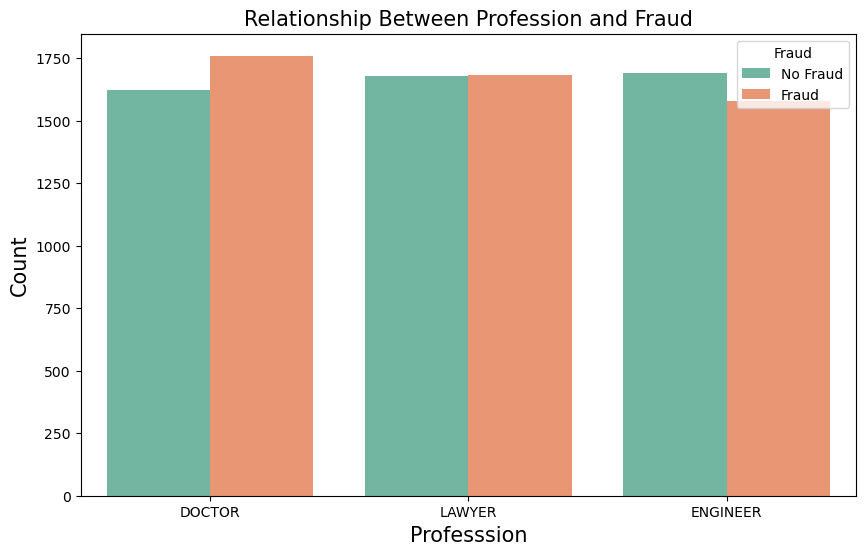

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Profession', hue='Fraud', palette='Set2')
#Add labels and title
plt.xlabel('Professsion', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Relationship Between Profession and Fraud', fontsize=15)
plt.legend(['No Fraud', 'Fraud'], title= 'Fraud')
plt.show()

## Plot Histogram of Income Distribution group by Profession

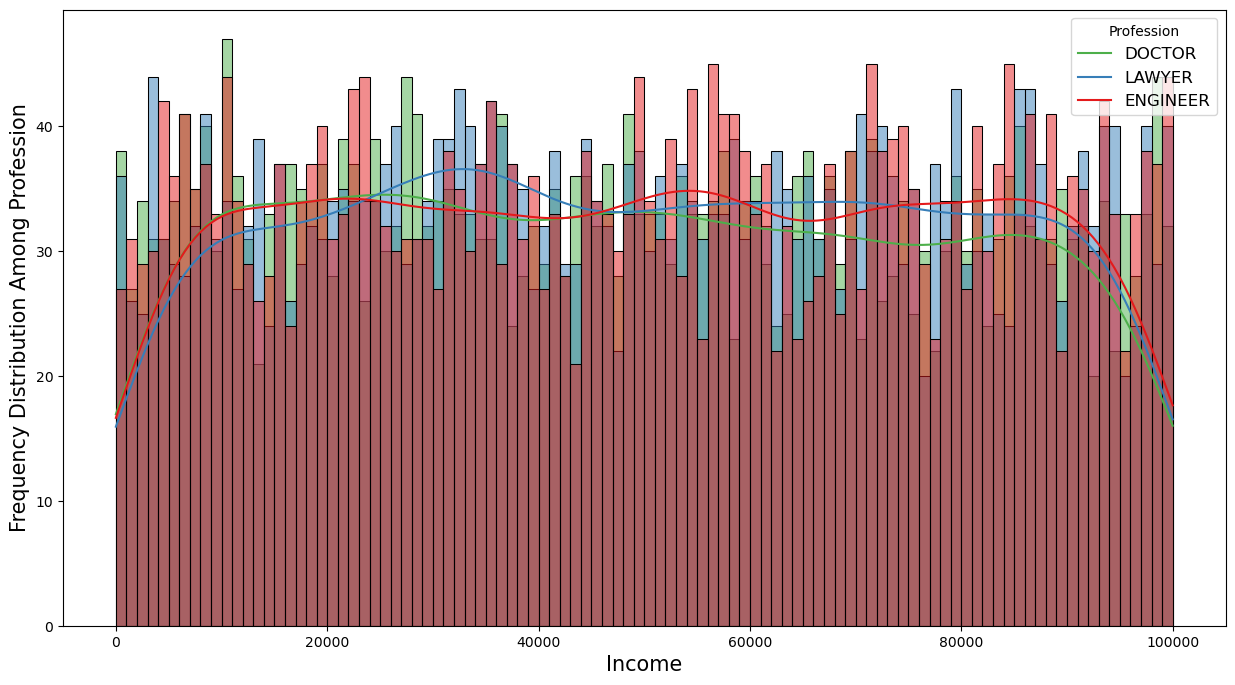

In [101]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x="Income", hue='Profession', kde=True, bins=100, palette='Set1')
#force y-axis to start at 0
plt.ylim(0,None)
#Add labels and title
plt.xlabel('Income', fontsize=15)
plt.ylabel('Frequency Distribution Among Profession',fontsize=15)
plt.legend(['DOCTOR', 'LAWYER', 'ENGINEER'], title='Profession', fontsize=12)
plt.show()

## Model Building

### Dataset splitting

In [102]:
#Define the features (X) and target (y)
X = df.drop(columns= df.columns[-1],) #All columns except Fraud

In [103]:
X

,Profession,Income
0,DOCTOR,42509
1,DOCTOR,80334
2,LAWYER,91552
3,LAWYER,43623
4,DOCTOR,22962
...,...,...
9995,DOCTOR,2705
9996,LAWYER,37862
9997,ENGINEER,83152
9998,DOCTOR,90620


In [104]:
y=df['Fraud']#Target variable

In [105]:
y

0       1
1       1
2       1
3       1
4       0
       ..
9995    1
9996    0
9997    1
9998    1
9999    1
Name: Fraud, Length: 10000, dtype: int64

In [82]:
#Split the dataset into training and testing sets(80% training and 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=42)

## Feature Encoding

In [83]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
#Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#Fit and transform the categorical features
encoded_data_train=onehot_encoder.fit_transform(X_train[['Profession']])
encoded_data_test=onehot_encoder.transform(X_test[['Profession']])

In [88]:
encoded_feature_names=onehot_encoder.get_feature_names_out(['Profession'])

In [89]:
#Create a DataFrame with the encoded column names 
onehot_df_train = pd.DataFrame(encoded_data_train, columns=encoded_feature_names, index=X_train.index)
onehot_df_test = pd.DataFrame(encoded_data_test, columns=encoded_feature_names, index=X_test.index)

In [90]:
#Concatenate the encoded columns back to the original dataset
X_train=pd.concat([X_train.drop('Profession', axis=1), onehot_df_train],axis =1)
X_test=pd.concat([X_test.drop('Profession', axis=1), onehot_df_test],axis =1)

In [91]:
X_train.info

<bound method DataFrame.info of       Income  Profession_DOCTOR  Profession_ENGINEER  Profession_LAWYER
9254   11783                0.0                  0.0                1.0
1561   95170                1.0                  0.0                0.0
1670   71846                0.0                  0.0                1.0
6087   46677                1.0                  0.0                0.0
6669   24225                0.0                  0.0                1.0
...      ...                ...                  ...                ...
5734   74962                1.0                  0.0                0.0
5191   58368                0.0                  0.0                1.0
5390   55123                1.0                  0.0                0.0
860    39488                0.0                  1.0                0.0
7270   28361                0.0                  0.0                1.0

[8000 rows x 4 columns]>

In [92]:
X_train.head()

,Income,Profession_DOCTOR,Profession_ENGINEER,Profession_LAWYER
9254,11783,0.0,0.0,1.0
1561,95170,1.0,0.0,0.0
1670,71846,0.0,0.0,1.0
6087,46677,1.0,0.0,0.0
6669,24225,0.0,0.0,1.0


In [93]:
X_test.head()

,Income,Profession_DOCTOR,Profession_ENGINEER,Profession_LAWYER
6252,88499,0.0,0.0,1.0
4684,98583,1.0,0.0,0.0
1731,69853,0.0,0.0,1.0
4742,34612,1.0,0.0,0.0
4521,62061,0.0,0.0,1.0


## Model Training

In [94]:
#Initialize RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=100, random_state=42) 
rf.fit(X_train, y_train) #Train the model

RandomForestClassifier(random_state=42)

In [95]:
y_rf_test_pred=rf.predict(X_test) #Make predictions on the test set

## Model Evaluation

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
cm = confusion_matrix(y_test, y_rf_test_pred)

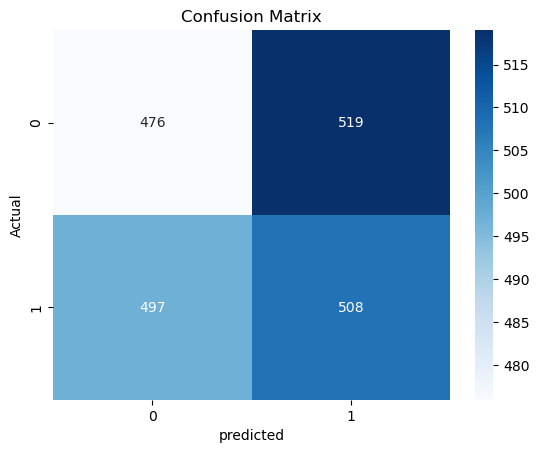

In [98]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [99]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_rf_test_pred)
print (report)

              precision    recall  f1-score   support

           0       0.49      0.48      0.48       995
           1       0.49      0.51      0.50      1005

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



## Comment

### Model Evaluation

The model Performance is Unsatisfactory.
Accuracy: 0.49 (49%) is poor as it is slightly worse than random guessing (50%)
Precision, Recall and F1_score of 0.49 shows that the model is struggling across both classes
Weighted averages are also 0.49 which aligns with the imbalance and underperformance

There is lack of sufficient features in the dataset.